# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from api_keys import api_key
import json
import requests
import seaborn as sns
import time as time

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities   = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities_count)
# print(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# create setting and key_facts
setting = {'units':'Imperial','appid':api_key}
key_facts = ['clouds.all','sys.country','dt','main.humidity',
             'main.temp_max','wind.speed','coord.lat','coord.lon']

cities_df = pd.DataFrame({"City":cities})
cities_df

,City
0,illoqqortoormiut
1,busselton
2,cabo san lucas
3,hilo
4,rikitea
...,...
599,port hawkesbury
600,maneadero
601,padilla
602,basco


In [20]:
cities_df.to_csv('output_data/cities.csv')

In [5]:
#Appends lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat = []
lng = []
cities_list = []

In [6]:
#Apply multiple api calls
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    #response = requests.get(city_url + city).json()
    
    try: 
        response = requests.get(f"{city_url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        cities_list = response["name"]
        print(f" Processing Record {counter} of Set 1 | {city}")
        #print(f"{city_url}&q={city}") 
        #print(city, counter)
        
        #Increment count by one.
        counter += 1
        
         # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
        # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue                  
print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
City not found. Skipping...
 Processing Record 1 of Set 1 | busselton
 Processing Record 2 of Set 1 | cabo san lucas
 Processing Record 3 of Set 1 | hilo
 Processing Record 4 of Set 1 | rikitea
 Processing Record 5 of Set 1 | grand gaube
 Processing Record 6 of Set 1 | arraial do cabo
 Processing Record 7 of Set 1 | iqaluit
 Processing Record 8 of Set 1 | bluff
 Processing Record 9 of Set 1 | aragats
City not found. Skipping...
City not found. Skipping...
 Processing Record 10 of Set 1 | provideniya
 Processing Record 11 of Set 1 | gat
 Processing Record 12 of Set 1 | nioro
City not found. Skipping...
 Processing Record 13 of Set 1 | chapais
 Processing Record 14 of Set 1 | ust-kuyga
 Processing Record 15 of Set 1 | jamestown
 Processing Record 16 of Set 1 | broken hill
 Processing Record 17 of Set 1 | atuona
 Processing Record 18 of Set 1 | castro
 Processing Record 19 of Set 1 | severo-kurilsk
City not found. Skipping...
 Processing Reco

 Processing Record 178 of Set 1 | panevezys
 Processing Record 179 of Set 1 | kloulklubed
 Processing Record 180 of Set 1 | tahoua
 Processing Record 181 of Set 1 | manokwari
 Processing Record 182 of Set 1 | mandera
 Processing Record 183 of Set 1 | byron bay
 Processing Record 184 of Set 1 | velka bites
 Processing Record 185 of Set 1 | inirida
 Processing Record 186 of Set 1 | dolinsk
City not found. Skipping...
 Processing Record 187 of Set 1 | hami
 Processing Record 188 of Set 1 | joshimath
 Processing Record 189 of Set 1 | kaduna
 Processing Record 190 of Set 1 | vostok
 Processing Record 191 of Set 1 | homer
 Processing Record 192 of Set 1 | morrinhos
 Processing Record 193 of Set 1 | salalah
 Processing Record 194 of Set 1 | pacific grove
 Processing Record 195 of Set 1 | pokhara
 Processing Record 196 of Set 1 | pathein
 Processing Record 197 of Set 1 | east london
 Processing Record 198 of Set 1 | ayan
 Processing Record 199 of Set 1 | pho chai
 Processing Record 200 of Set 

 Processing Record 358 of Set 1 | puerto escondido
 Processing Record 359 of Set 1 | terre-de-bas
 Processing Record 360 of Set 1 | capreol
 Processing Record 361 of Set 1 | port macquarie
 Processing Record 362 of Set 1 | ceres
City not found. Skipping...
 Processing Record 363 of Set 1 | ottawa
 Processing Record 364 of Set 1 | tadine
 Processing Record 365 of Set 1 | bataipora
 Processing Record 366 of Set 1 | vila franca do campo
City not found. Skipping...
 Processing Record 367 of Set 1 | laguna
 Processing Record 368 of Set 1 | gueret
 Processing Record 369 of Set 1 | ryotsu
 Processing Record 370 of Set 1 | bara
 Processing Record 371 of Set 1 | karratha
 Processing Record 372 of Set 1 | kulhudhuffushi
City not found. Skipping...
 Processing Record 373 of Set 1 | tambong
 Processing Record 374 of Set 1 | tvedestrand
 Processing Record 375 of Set 1 | gdov
 Processing Record 376 of Set 1 | kenai
City not found. Skipping...
 Processing Record 377 of Set 1 | nouadhibou
 Processing 

 Processing Record 540 of Set 1 | santa rosa
 Processing Record 541 of Set 1 | cacoal
 Processing Record 542 of Set 1 | la paz centro
 Processing Record 543 of Set 1 | esso
City not found. Skipping...
 Processing Record 544 of Set 1 | ano mera
 Processing Record 545 of Set 1 | aripuana
 Processing Record 546 of Set 1 | gorom-gorom
 Processing Record 547 of Set 1 | xam nua
 Processing Record 548 of Set 1 | vao
City not found. Skipping...
 Processing Record 549 of Set 1 | myitkyina
 Processing Record 550 of Set 1 | port hawkesbury
City not found. Skipping...
 Processing Record 551 of Set 1 | padilla
 Processing Record 552 of Set 1 | basco
 Processing Record 553 of Set 1 | ancud
---------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# # Create a dictonary with the lists generated
# weather_dict = {
#     "City": city_name,
#     "Cloudiness":cloudiness, 
#     "Country":country,
#     "Date":date, 
#     "Humidity": humidity,
#     "Lat":lat, 
#     "Lng":lng, 
#     "Max Temp": max_temp,
#     "Wind Speed":wind_speed
# }

# # Create a data frame from dictionary
# weather_data = pd.DataFrame(weather_dict)

# # Display count of weather data values 
# weather_data.count()

In [9]:
#Create a dataframe from a dictionary of the list generated
weather_df = pd.DataFrame({
     'City':city_name,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })

weather_df
#weather_df.to_csv(output_data_file)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Busselton,100,AU,1574135320,32,-33.64,115.35,81.00,13.58
1,Cabo San Lucas,5,MX,1574135187,88,22.89,-109.91,78.01,8.05
2,Hilo,40,US,1574135347,78,19.71,-155.08,78.80,4.70
3,Rikitea,88,PF,1574135298,84,-23.12,-134.97,75.83,18.92
4,Grand Gaube,40,MU,1574135338,94,-20.01,57.66,79.00,1.12
...,...,...,...,...,...,...,...,...,...
548,Myitkyina,1,MM,1574136492,62,25.38,97.40,75.24,2.73
549,Port Hawkesbury,90,CA,1574136493,93,45.62,-61.36,42.01,21.92
550,Padilla,40,CO,1574136495,77,3.23,-76.31,69.80,4.70
551,Basco,90,US,1574136496,93,40.33,-91.20,44.01,4.70


In [10]:
weather_df.count()

City               553
Cloudiness         553
Country            553
Date               553
Humidity           553
Lat                553
Lng                553
Max Temperature    553
Wind Speed         553
dtype: int64

In [24]:
#Save data frame to CSV
weather_df.to_csv('Output_data/weather_data.csv')

#Display data frame head 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Busselton,100,AU,1574135320,32,-33.64,115.35,81.00,13.58
1,Cabo San Lucas,5,MX,1574135187,88,22.89,-109.91,78.01,8.05
2,Hilo,40,US,1574135347,78,19.71,-155.08,78.80,4.70
3,Rikitea,88,PF,1574135298,84,-23.12,-134.97,75.83,18.92
4,Grand Gaube,40,MU,1574135338,94,-20.01,57.66,79.00,1.12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

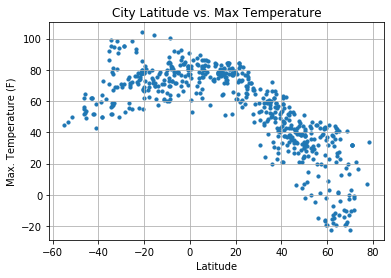

In [14]:
# Scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temperature"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

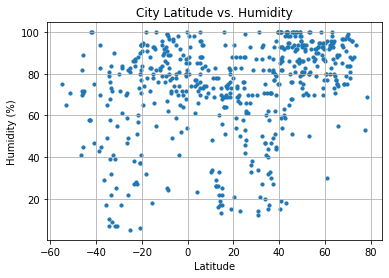

In [16]:
# Scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

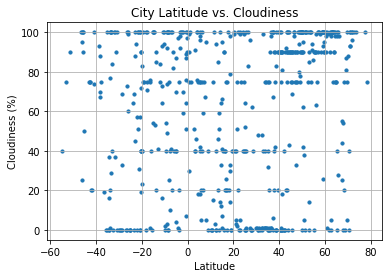

In [17]:
# Scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

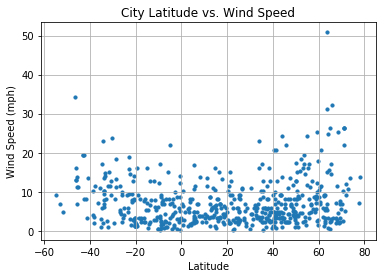

In [18]:
# Scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()



# OBSERVABLE TRENDS

* The temperature increases as we approach the equator. However, temperature peaks at around 20 degrees latitude, not exactly at the equatorial line. This may be due to the Earth's tilt in the axis known as obliquity.

* There is not a strong correlation with Cloudiness and Humidity to Latitude as shown in the plot.The visualizations below show a great variety of values at similar latitudes.

* Wind speed appears to slightly increase as we move away from the equator. We would need to go beyond the ranged examined to make a definitive conclusion.

